In [23]:
####################################
#ENVIRONMENT SETUP

In [39]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import xarray as xr

import sys; import os; import time; from datetime import timedelta
import pickle
import h5py

In [ ]:
#MAIN DIRECTORIES
def GetDirectories():
    mainDirectory='/mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/'
    mainCodeDirectory=os.path.join(mainDirectory,"Code/CodeFiles/")
    scratchDirectory='/mnt/lustre/koa/scratch/air673/'
    codeDirectory=os.getcwd()
    return mainDirectory,mainCodeDirectory,scratchDirectory,codeDirectory

[mainDirectory,mainCodeDirectory,scratchDirectory,codeDirectory] = GetDirectories()

In [ ]:
def GetPlottingDirectory(plotFileName, plotType):
    plottingDirectory = mainCodeDirectory=os.path.join(mainDirectory,"Code","PLOTTING")
    
    specificPlottingDirectory = os.path.join(plottingDirectory, plotType)
    os.makedirs(specificPlottingDirectory, exist_ok=True)

    plottingFileName=os.path.join(specificPlottingDirectory, plotFileName)

    return plottingFileName

In [ ]:
#IMPORT CLASSES (from current directory)
sys.path.append(os.path.join(mainCodeDirectory,"Variable_Calculation"))
from CLASSES_Variable_Calculation import ModelData_Class, DataManager_Class

In [ ]:
####################################
#LOADING CLASSES

In [ ]:
#data loading class
ModelData = ModelData_Class(mainDirectory, scratchDirectory, simulationNumber=1)
# #data manager class
# DataManager = DataManager_Class(mainDirectory, scratchDirectory, ModelData.res, ModelData.t_res, ModelData.Nz_str, #just need this one for the data loading function
#                                 ModelData.Np_str, dataType="Figures", dataName="Figures", dtype="float32")

In [ ]:
####################################
#SPECIFIC LIBRARIES

In [25]:
import pandas as pd

import matplotlib.lines as mlines

import cartopy.crs as ccrs;import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import glob
from datetime import datetime

In [26]:
####################################
#FUNCTIONS

In [27]:
# gndirt
# Description: Infrared Thermometer: Ground surface temperature
# Site: Houston, TX; Tracking Aerosol Convection interactions ExpeRiment (HOU)
# Location: Houston, TX; AMF1 (main site for TRACER) 
# Facility Code: M1
# Category: Radiometric
# Data Type: Routine Data 
# Source Instrument/Data: Infrared Thermometer 
# Start Date: 2021-08-04 
# End Date: 2022-10-01 

main_data_location = '/mnt/lustre/koa/koastore/torri_group/air_directory/Projects/DCI-Project/Code/CodeFiles/Initial_Figures/Figures/Campaign_Data/'

In [28]:
def GetLandData(search_date):
    import glob
    import xarray as xr

    data_location = main_data_location+'surface_data/'
    
    # Search for files containing "20220622"
    matching_files = glob.glob(f"{data_location}*{search_date}*.nc")
    
    # Open the first matching file if it exists
    if matching_files:
        file_to_open = matching_files[0]  # Take the first match
        # print(f"Opening file: {file_to_open}")
        ds = xr.open_dataset(file_to_open)
    else:
        print("No file found for the given date.")
    return ds

In [29]:
# #PLOT ONE

# ds=GetLandData('20220622')
# ###########################################################################################
# ds['time'] = ds['time'] - np.timedelta64(5, 'h')
# timestamps=ds['time']

# search_date = "2022-06-22"

# # Find matching timestamps
# matches = np.char.startswith(timestamps.astype(str), search_date)
# where=np.where(matches==True)

# true_data=ds['sfc_ir_temp'][where].values

# start_time = pd.Timestamp(timestamps[0].values)  # First timestamp
# end_time = pd.Timestamp(timestamps[-1].values)   # Last timestamp

# # Generate new time array with interpolated values (e.g., every 10 minutes)
# new_time_values = pd.date_range(start=start_time, end=end_time, periods=len(true_data))

# # Plot with the new interpolated time axis
# plt.plot(new_time_values, true_data, alpha=0.75, color='green', label='Observed Land Data')
# plt.ylabel('T (K)')
# plt.xticks(rotation=45);
# plt.title('Diurnal Cycle')
# ###########################################################################################
# print(len(new_time_values))

In [30]:
# #PLOT TWO

# ds=GetLandData('20220622')
# ###########################################################################################
# ds['time'] = ds['time'] - np.timedelta64(5, 'h')
# timestamps=ds['time']

# search_date = "2022-06-22"

# # Find matching timestamps
# matches = np.char.startswith(timestamps.astype(str), search_date)
# where=np.where(matches==True)

# true_data=ds['sfc_ir_temp'][where].values

# start_time = pd.Timestamp(timestamps[0].values)  # First timestamp
# end_time = pd.Timestamp(timestamps[-1].values)   # Last timestamp

# # Generate new time array with interpolated values (e.g., every 10 minutes)
# new_time_values = pd.date_range(start=start_time, end=end_time, periods=len(true_data))

# # Plot with the new interpolated time axis
# plt.plot(new_time_values, true_data, alpha=0.75, color='green', label='Observed Land Data')
# plt.ylabel('T (K)')
# plt.xticks(rotation=45);
# ###########################################################################################
# print(len(new_time_values))

# #15 Day Average Diurnal Cycle
# ###########################################################################################

# avgArray=np.zeros((1,1140))


# # Define data location
# data_location = '/mnt/lustre/koa/koastore/torri_group/air_directory/DCI-Project/Figures/campaign_data/surface_data/'

# # Define search date range (June 7 to July 7, 2022)
# start_date = pd.Timestamp("2022-06-07")
# end_date = pd.Timestamp("2022-07-07")

# # Generate list of dates in YYYYMMDD format
# search_dates = [(start_date + pd.Timedelta(days=i)).strftime("%Y%m%d") for i in range((end_date - start_date).days + 1)]

# count=0
# for ind in np.arange(len(search_dates)):
#     ds = GetLandData(search_dates[ind])

#     ###########################################################################################
#     ds['time'] = ds['time'] - np.timedelta64(5, 'h')
#     timestamps=ds['time']
    
#     # search_date = "2022-06-22"
#     search_date=search_dates[ind]
#     search_date = datetime.strptime(search_date, "%Y%m%d").strftime("%Y-%m-%d")
    
#     # Find matching timestamps
#     matches = np.char.startswith(timestamps.astype(str), search_date)
#     where=np.where(matches==True)

#     true_data=ds['sfc_ir_temp'][where].values

#     # start_time = pd.Timestamp(timestamps[0].values)  # First timestamp
#     # end_time = pd.Timestamp(timestamps[-1].values)   # Last timestamp

#     # # Generate new time array with interpolated values (e.g., every 10 minutes)
#     # new_time_values = pd.date_range(start=start_time, end=end_time, periods=len(true_data))
#     # print(new_time_values);print('\n')
    
#     if len(true_data) == 1140: #excluding 06/08/22
#         count+=1
#         avgArray+=true_data
# avgArray/=count

# # Plot with the new interpolated time axis
# plt.plot(new_time_values, true_data, alpha=0.5, color='red', label='15d Average')
# plt.ylabel('T (K)')
# plt.xticks(rotation=45);
# ###########################################################################################
# plt.legend()

# plt.title('Diurnal Cycle and 15 Day Average Around Date')

In [31]:
#Description: ERA5 hourly data on single levels from 1940 to present

In [32]:
def load_data(data_location):
    data = xr.open_dataset(data_location+'/era5.nc') 
    data['valid_time'] = data['valid_time'] - np.timedelta64(5, 'h')
    return data

def extract_data_subset(data):
    timestamps = data['valid_time'].values.astype(str)
    t_where = np.where(np.char.startswith(timestamps, '2022-06-22T11'))[0]

    bot_lat_ind,top_lat_ind=25,38
    left_lon_ind,right_lon_ind=255,270
    bot_lat=data['latitude'][bot_lat_ind].item()
    top_lat=data['latitude'][top_lat_ind].item()
    left_lon=data['longitude'][left_lon_ind].item()
    right_lon=data['longitude'][right_lon_ind].item()
    sst_og = data['sst'].sel(latitude=slice(top_lat_ind,bot_lat_ind),longitude=slice(left_lon_ind,right_lon_ind))
    skt_og = data['skt'].sel(latitude=slice(top_lat_ind,bot_lat_ind),longitude=slice(left_lon_ind,right_lon_ind))

    sst=sst_og.isel(valid_time=t_where)[0]
    sst=sst.assign_coords(longitude=((sst_og.longitude + 180) % 360 - 180)) # Convert longitudes from 0-360 to -180 to 180
    skt=skt_og.isel(valid_time=t_where)[0]
    skt=skt.assign_coords(longitude=((sst_og.longitude + 180) % 360 - 180)) # Convert longitudes from 0-360 to -180 to 180
    sst = sst.isel(latitude=slice(None, None, -1))  # Flip latitude
    skt = skt.isel(latitude=slice(None, None, -1))  # Flip latitude

    return sst_og, skt_og, sst, skt, t_where, timestamps, bot_lat, top_lat, left_lon, right_lon

def set_yticks(ax2, skt_diurnal_land, skt_diurnal_ocean, true_data):
    y_min = min(skt_diurnal_land.min(), skt_diurnal_ocean.min(),true_data.min())  
    y_max = max(skt_diurnal_land.max(), skt_diurnal_ocean.max(),true_data.max())  
    num_ticks = 10  # Adjust number of ticks as needed
    y_ticks = np.linspace(y_min, y_max, num=num_ticks)
    ax2.set_yticks(y_ticks);

def print_temperatures(timestamps, skt_diurnal_land, true_time_values, true_data, skt_diurnal_ocean):
    land_start = np.where(np.char.startswith(timestamps, '2022-06-22T06'))[0]
    print(f'Model-Start Land Temperature from ERA-5 = {skt_diurnal_land[land_start][0]:.2f}')
    target_time = pd.Timestamp("2022-06-22 06:00:00")
    land_start_true = np.argmin(np.abs(true_time_values - target_time))
    print(f'Model-Start Land Temperature from True Data = {true_data[land_start_true]:.2f}')
    print(f'Average Ocean Temperature = {skt_diurnal_ocean.mean():.2f}')

def LoadLandOceanData(filename=main_data_location+f'land_ocean_data_{res}_{t_res}.pkl'):
    #created in campaign_data/model_diurnal_cycle.ipynb
    import pickle
    with open(filename, 'rb') as f:
        data_list = pickle.load(f)
    return data_list[0], data_list[1]

def plot_model_data(ax2, true_data):
    ###############################################################################################################
    #LOADING IN MODEL DATA FOR LINEPLOT #*#*#*#
    ###########################################################################################
    model_data=True
    if model_data==True:
        import numpy as np
        import matplotlib.pyplot as plt
        import xarray as xr
        import matplotlib.ticker as ticker
        n_bins=10
        hours_per_timestep=60/5
        previous_hours=11
        previous_times=-hours_per_timestep*previous_hours

        # Load dataset
        [land_data,ocean_data]=LoadLandOceanData()#CREATED IN MODEL_DIURNAL_CYCLE.py

        model_start_time = pd.Timestamp("2022-06-22 06:00:00")  
        model_end_time = pd.Timestamp("2022-06-22 17:00:00")
        
        # Generate new time array with interpolated values (same length as true_data)
        model_time_values = pd.date_range(start=model_start_time, end=model_end_time, periods=len(land_data))
        ax2.plot(model_time_values,land_data, color='brown', linestyle='dashed', label='Model Land')
        ax2.plot(model_time_values,ocean_data, color='blue', linestyle='dashed', label='Model Ocean')
    ###########################################################################################
    return ax2

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def plot_main_map(ax1, skt, timestamps, t_where, land_lat, land_lon, ocean_lat, ocean_lon):
    # contour = ax1.contourf(skt['longitude'], skt['latitude'], skt, transform=ccrs.PlateCarree(), cmap='viridis')
    # cbar = ax1.figure.colorbar(contour, ax=ax1, orientation='vertical', 
    #                        fraction=0.05, pad=0)
    # cbar.set_label("Skin Temperature (K)", fontsize=12)
    
    contour = ax1.contourf(skt['longitude'], skt['latitude'], skt, 
                           transform=ccrs.PlateCarree(), cmap='viridis')
    
    # Create colorbar inset outside the ax1 box
    cax = inset_axes(ax1,
                     width="3%",        # width of colorbar
                     height="100%",     # full height of plot
                     loc='lower left',  # irrelevant here, overridden by bbox_to_anchor
                     bbox_to_anchor=(1.0, 0., 1, 1),  # exactly at right edge
                     bbox_transform=ax1.transAxes,
                     borderpad=0)
    
    cbar = ax1.figure.colorbar(contour, cax=cax, orientation='vertical')
    cbar.set_label("Skin Temperature (K)", fontsize=12)

    #####################################

    ax1.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    ax1.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')
    ax1.coastlines()

    lon_min, lon_max = skt.longitude.min().item(), skt.longitude.max().item()
    lat_min, lat_max = skt.latitude.min().item(), skt.latitude.max().item()

    ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax1.set_xticks(np.linspace(lon_min, lon_max, num=8), crs=ccrs.PlateCarree())
    ax1.set_yticks(np.linspace(lat_min, lat_max, num=12), crs=ccrs.PlateCarree())

    ax1.scatter(land_lon, land_lat, color='brown', label="Land Point",zorder=10)
    ax1.scatter(ocean_lon, ocean_lat, color='blue', label="Ocean Point",zorder=10)

    landtemp_val = skt.sel(latitude=land_lat, longitude=land_lon, method='nearest').item()
    oceantemp_val = skt.sel(latitude=ocean_lat, longitude=ocean_lon, method='nearest').item()
    ax1.text(0.5, 1.05, f'Land temperature: {landtemp_val:.2f} °C | Ocean temperature: {oceantemp_val:.2f} °C',
             ha='center', va='bottom', fontsize=10, transform=ax1.transAxes)

    ax1.axvline(land_lon, linestyle='dashed', color='grey')
    ax1.axhline(land_lat, linestyle='dashed', color='grey')
    ax1.axvline(ocean_lon, linestyle='dashed', color='blue', alpha=0.4)
    ax1.axhline(ocean_lat, linestyle='dashed', color='blue', alpha=0.4)

    # ax1.set_title(f'Time = {timestamps[t_where[0]][:13]}:00 UTC-5 (LT)', fontsize=10)
    time_str = timestamps[t_where[0]][:13]  # e.g. '2025-07-22T11'
    time_str = time_str.replace('T', ' ')  # '2025-07-22 11'
    ax1.set_title(f'Time: {time_str}:00 UTC-5 (Local Time)', fontsize=10)
    # ax1.legend(loc="upper right", fontsize=10)


def plot_era5_lineplot(ax2, sst_og, skt_og, land_lat, land_lon, ocean_lat, ocean_lon):
    sst_og = sst_og.assign_coords(longitude=((sst_og.longitude + 180) % 360 - 180))
    skt_og = skt_og.assign_coords(longitude=((skt_og.longitude + 180) % 360 - 180))
    skt_diurnal_land = skt_og.sel(latitude=land_lat, longitude=land_lon, method='nearest').values
    skt_diurnal_ocean = skt_og.sel(latitude=ocean_lat, longitude=ocean_lon, method='nearest').values

    time_values = pd.to_datetime(skt_og['valid_time'].values)

    ax2.plot(time_values, skt_diurnal_land, color='brown', label='ERA-5 Land')
    ax2.plot(time_values, skt_diurnal_ocean, color='blue', label='ERA-5 Ocean')

    even_indices = np.arange(1, len(time_values), 2)
    ax2.set_xticks(time_values[even_indices])
    ax2.set_xticklabels(time_values[even_indices].strftime('%H:%M'), rotation=45, fontsize=10)

    return skt_diurnal_land, skt_diurnal_ocean, time_values

def plot_real_data_lineplot(ax2):
    ds = GetLandData('20220622')
    ds['time'] = ds['time'] - np.timedelta64(5, 'h')
    timestamps_true = ds['time']

    search_date = "2022-06-22"
    matches = np.char.startswith(timestamps_true.astype(str), search_date)
    where = np.where(matches == True)

    true_data = ds['sfc_ir_temp'][where].values

    start_time = pd.Timestamp(timestamps_true[0].values)
    end_time = pd.Timestamp(timestamps_true[-1].values)

    true_time_values = pd.date_range(start=start_time, end=end_time, periods=len(true_data))

    ax2.plot(true_time_values, true_data, alpha=0.75, color='green', label='Observed Land')
    return true_data, true_time_values

In [34]:
#2D CONFIGURATION PLOT
ocean_fraction=2/8

def plot_domain_configuration(ax, ocean_fraction=ocean_fraction, bottom=0, top=200, left=0, right=512):
    center = left + ((right - left) * ocean_fraction)
    mid_y = (bottom + top) / 2  # Middle of y-axis for text

    # Axis labels and title
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_title(f'Domain Configuration')

    ax.set_xlim(left, right)
    ax.set_xticks([left, right])

    ax.set_ylim(bottom, top)
    ax.set_yticks([bottom, top])

    # Colors
    seacolor = (0, 89/255, 179/255)
    landcolor = (139/255, 69/255, 19/255)

    # Text labels with vertical centering
    ax.text((left + center) / 2, mid_y, 'Sea', va='center', ha='center')
    ax.axvspan(left, center, color=seacolor, alpha=0.3)

    ax.text((right + center) / 2 - 10, mid_y, 'Land', va='center', ha='center')
    ax.axvspan(center, right, color=landcolor, alpha=0.3)

    # Center line
    ax.axvline(x=center, color='black', linewidth=3)

# #PLOTTING
# fig, ax = plt.subplots(figsize=(10, 2))  # Aspect ratio 5 means height = width/5
# plot_domain_configuration(ax)

In [35]:
#3D CONFIGURATION PLOT
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy as np

ocean_fraction=2/8
def get_corners(x_max, y_max, z_max):
    """Define 8 corners of the 3D box."""
    return np.array([
        [0, 0, 0],
        [x_max, 0, 0],
        [x_max, y_max, 0],
        [0, y_max, 0],
        [0, 0, z_max],
        [x_max, 0, z_max],
        [x_max, y_max, z_max],
        [0, y_max, z_max],
    ])


def get_edges(corners):
    """Return list of 12 edges as pairs of corner points."""
    return [
        [corners[0], corners[1]],
        [corners[1], corners[2]],
        [corners[2], corners[3]],
        [corners[3], corners[0]],
        [corners[4], corners[5]],
        [corners[5], corners[6]],
        [corners[6], corners[7]],
        [corners[7], corners[4]],
        [corners[0], corners[4]],
        [corners[1], corners[5]],
        [corners[2], corners[6]],
        [corners[3], corners[7]],
    ]


def plot_box_edges(ax, edges):
    """Plot the box edges as black lines."""
    box_lines = Line3DCollection(edges, colors='black', linewidths=1.5)
    ax.add_collection3d(box_lines)


def configure_ticks_and_hide_hashes(ax, x_max, y_max, z_max):
    """Set ticks locations, pad, and hide tick marks (hashes)."""
    ax.tick_params(axis='x', pad=2)
    ax.tick_params(axis='y', pad=-2)
    ax.tick_params(axis='z', pad=-2)

    ax.set_xticks(np.linspace(x_max, 0, 5))
    ax.set_yticks(np.linspace(y_max, 0, 5))
    ax.set_zticks(np.linspace(0, z_max, 6))

    ax.xaxis._axinfo['ticklabel_direction'] = -1  # default is 1
    ax.yaxis._axinfo['ticklabel_direction'] = -1
    ax.zaxis._axinfo['ticklabel_direction'] = -1

    for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
        axis._axinfo['tick']['inward_factor'] = 0
        axis._axinfo['tick']['outward_factor'] = 0
        axis._axinfo['tick']['color'] = (0, 0, 0, 0)  # fully transparent

def plot_surface_planes(ax, x_max, y_max, ocean_fraction, seacolor, landcolor):
    """Plot translucent sea and land surface planes."""
    # Land surface
    xx, yy = np.meshgrid(
        np.linspace(x_max * ocean_fraction, x_max, 2),
        np.linspace(0, y_max, 2)
    )
    zz = np.zeros_like(xx)
    ax.plot_surface(xx, yy, zz, color=landcolor, alpha=0.3)

    # Sea surface
    xx, yy = np.meshgrid(
        np.linspace(0, x_max * ocean_fraction, 2),
        np.linspace(0, y_max, 2)
    )
    ax.plot_surface(xx, yy, zz, color=seacolor, alpha=0.3)


def add_surface_labels(ax, x_max, y_max, ocean_fraction):
    """Add text labels 'Sea' and 'Land' slightly above surfaces."""
    ax.text(
        x_max * ocean_fraction / 2 - 20,
        y_max / 2 + 20,
        0.1,
        'Sea',
        color='blue',
        fontsize=12,
        fontfamily='sans-serif',
        weight='normal'
    )
    ax.text(
        x_max * ocean_fraction + (x_max - x_max * ocean_fraction) / 2 - 20,
        y_max / 2 + 20,
        0.1,
        'Land',
        color='brown',
        fontsize=12,
        fontfamily='sans-serif',
        weight='normal'
    )


def set_axis_labels_and_view(ax):
    """Set axis labels with custom padding and view angle."""
    ax.set_xlabel('x(km)', labelpad=-33)
    ax.set_ylabel('y (km)', labelpad=-27)
    ax.set_zlabel('z (km)', labelpad=-25)

    # Rotate view so Y axis is on left
    ax.view_init(elev=20, azim=50)


def plot_domain_3d(ax,x_max=512, y_max=200, z_max=25, ocean_fraction=ocean_fraction):
    """Main plotting function assembling all parts."""

    # Colors
    seacolor = (0, 89 / 255, 179 / 255)
    landcolor = (139 / 255, 69 / 255, 19 / 255)

    # Setup box corners and edges
    corners = get_corners(x_max, y_max, z_max)
    edges = get_edges(corners)

    # Plot box edges
    plot_box_edges(ax, edges)

    # Set axis limits (reversed axes)
    ax.set_xlim(x_max, 0)
    ax.set_ylim(y_max, 0)
    ax.set_zlim(0, z_max)

    # Control aspect ratio (X:Y:Z)
    # ax.set_box_aspect([5, 2, 1])

    # Configure ticks and hide tick marks
    configure_ticks_and_hide_hashes(ax, x_max, y_max, z_max)

    # Plot translucent sea and land surfaces
    plot_surface_planes(ax, x_max, y_max, ocean_fraction, seacolor, landcolor)

    # Add 'Sea' and 'Land' labels
    add_surface_labels(ax, x_max, y_max, ocean_fraction)

    # Axis labels and view
    set_axis_labels_and_view(ax)

    # Tight layout and margins
    # plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.95)


def replace_z_ticks(ax, x_pos, y_pos, z_adj, z_max, num_ticks=6, offset=15):
    """Replace Z axis ticks with custom text at shifted 3D positions."""
    z_ticks = np.linspace(0, z_max, num_ticks)
    
    # Hide the default z tick labels
    ax.set_zticklabels([])
    
    # Add custom labels at shifted positions
    for z in z_ticks:
        ax.text(
            x_pos,             # Shifted x position (further into the box)
            y_pos,             # Shifted y position
            z+z_adj,                 # Actual z tick position
            f'{z:.0f}',        # Label text
            color='black',
            fontsize=10,
            ha='right',        # Horizontal alignment
            va='center'        # Vertical alignment
        )

        
# #PLOTTING
# fig = plt.figure(figsize=(8, 5))  # Size appropriate for 5:2 aspect
# gs = gridspec.GridSpec(1, 1)

# # Add subplot using GridSpec
# ax = fig.add_subplot(gs[0], projection='3d')

# # Run your 3D plot function
# plot_domain_3d(ax)
# replace_z_ticks(ax, x_pos=-15, y_pos=200, z_max=25, num_ticks=6)

Model-Start Land Temperature from ERA-5 = 298.95
Model-Start Land Temperature from True Data = 303.70
Average Ocean Temperature = 303.13


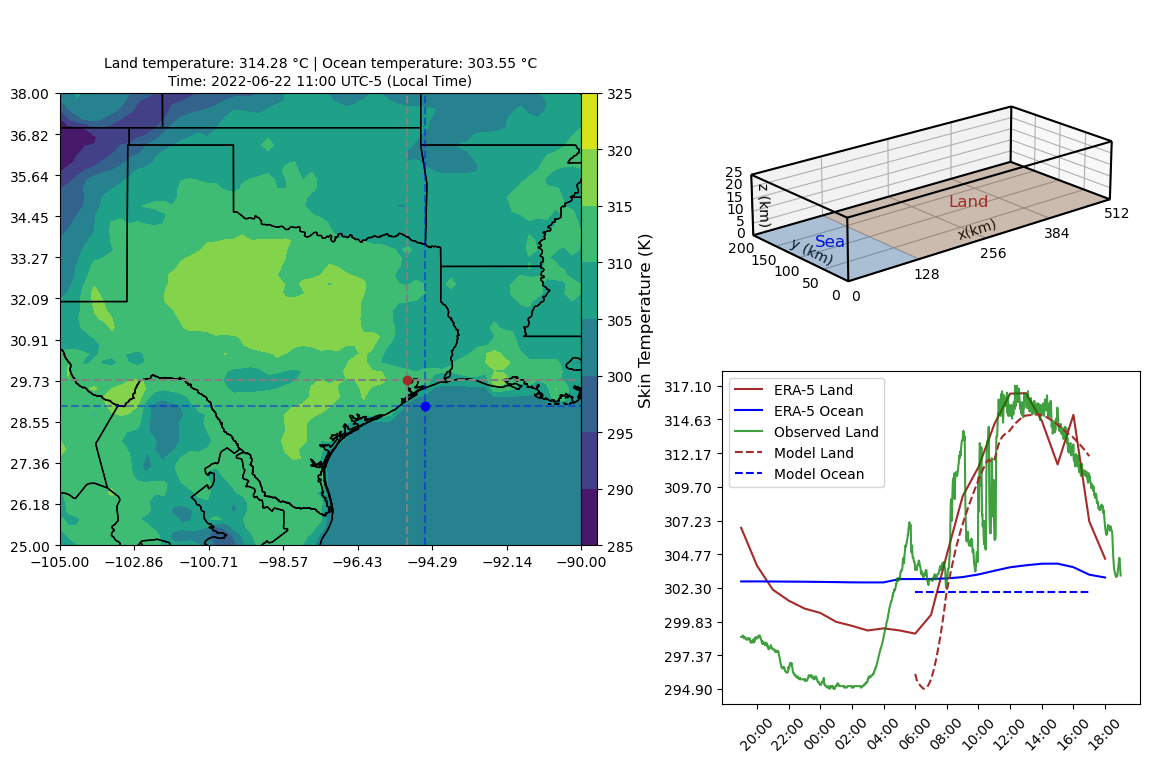

In [36]:
def main():
    data_location = main_data_location

    era_data = load_data(data_location)
    sst_og, skt_og, sst, skt, t_where, timestamps, bot_lat, top_lat, left_lon, right_lon = extract_data_subset(era_data)

    land_lat, ocean_lat = 29.75, 29
    land_lon, ocean_lon = -95, -94.5

    # Create figure and GridSpec
    fig = plt.figure(figsize=(12, 10), dpi=100)
    gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig, height_ratios=[1+0.1, 1], width_ratios=[2.5, 2])

    # Create axes
    ax1 = fig.add_subplot(gs[:, 0], projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(gs[1, 1])

    # ax3 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 1], projection='3d')

    # Plotting functions take axes as input
    plot_main_map(ax1, skt, timestamps, t_where, land_lat, land_lon, ocean_lat, ocean_lon)
    skt_diurnal_land, skt_diurnal_ocean, time_values = plot_era5_lineplot(ax2, sst_og, skt_og, land_lat, land_lon, ocean_lat, ocean_lon)
    true_data, true_time_values = plot_real_data_lineplot(ax2)

    # Optionally plot the 15-day average
    # plot_15_day_average_diurnal_cycle(ax2, GetLandData)

    plot_model_data(ax2, true_data)
    set_yticks(ax2, skt_diurnal_land, skt_diurnal_ocean, true_data)

    print_temperatures(timestamps, skt_diurnal_land, true_time_values, true_data, skt_diurnal_ocean)

    ax2.legend(loc='upper left')
     
    #PLOTTING DOMAIN CONFIG
    # plot_domain_configuration(ax3)
    plot_domain_3d(ax3)
    replace_z_ticks(ax3, x_pos=-15, y_pos=200, z_adj=2, z_max=25, num_ticks=6)
    ax3.set_box_aspect([512, 230, 95])  # x:y:z ratio, y is twice taller

    #FIXING GRIDSPEC COLUMN SPACING
    plt.subplots_adjust(wspace=0.3)
    
    #MOVING PLOT DOWN A BIT
    pos = ax3.get_position()  # get [left, bottom, width, height]
    # Make it taller by increasing bottom and height, or shift vertically:
    new_pos = [pos.x0, pos.y0 - 0.1, pos.width, pos.height + 0.05]
    ax3.set_position(new_pos)
    ax3.set_facecolor((0,0,0,0))

    #SAVING
    plotFileName = f"LandConfig_DiurnalCycle_{res}_{t_res}_{Np_str}.jpg"
    plottingFileName = GetPlottingDirectory(plotFileName, plotType="Figures/Campaign_Data")
    fig.savefig(plottingFileName, dpi=300, bbox_inches='tight')

main()